# Apply Several Preprocessing Method to Modeling at Once: Decision Tree Classifier

data: Adult.csv  
* Target: income  

preprocessing:
* missing value: simple imputer constant
* one hot encoding: relationship, sex, race
* binary encoding: workclass, marital status, occupation, native country
* ordinal: education (sudah diencode didata awal)
* no treatment: numerical

drop: fnlwgt  

Random state: 10, data splitting 70-30, Tree (max depth: 5, criterion: entropy)

In [1]:
# library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

## Data
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
-- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
-- These are the demographics and other 
<br>
features to describe a person

We will explore the possibility in predicting income level based on the individual’s personal information.

In [2]:
df= pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Missing Value  

perhatikan '?' pada kolom workclass dan occupation. Pada dataset ini, missing value ditandai dengan '?'.

In [3]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
df=df.replace('?',np.nan) #ganti ? dengan nan

In [5]:
df.isna().sum()/df.shape[0]*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

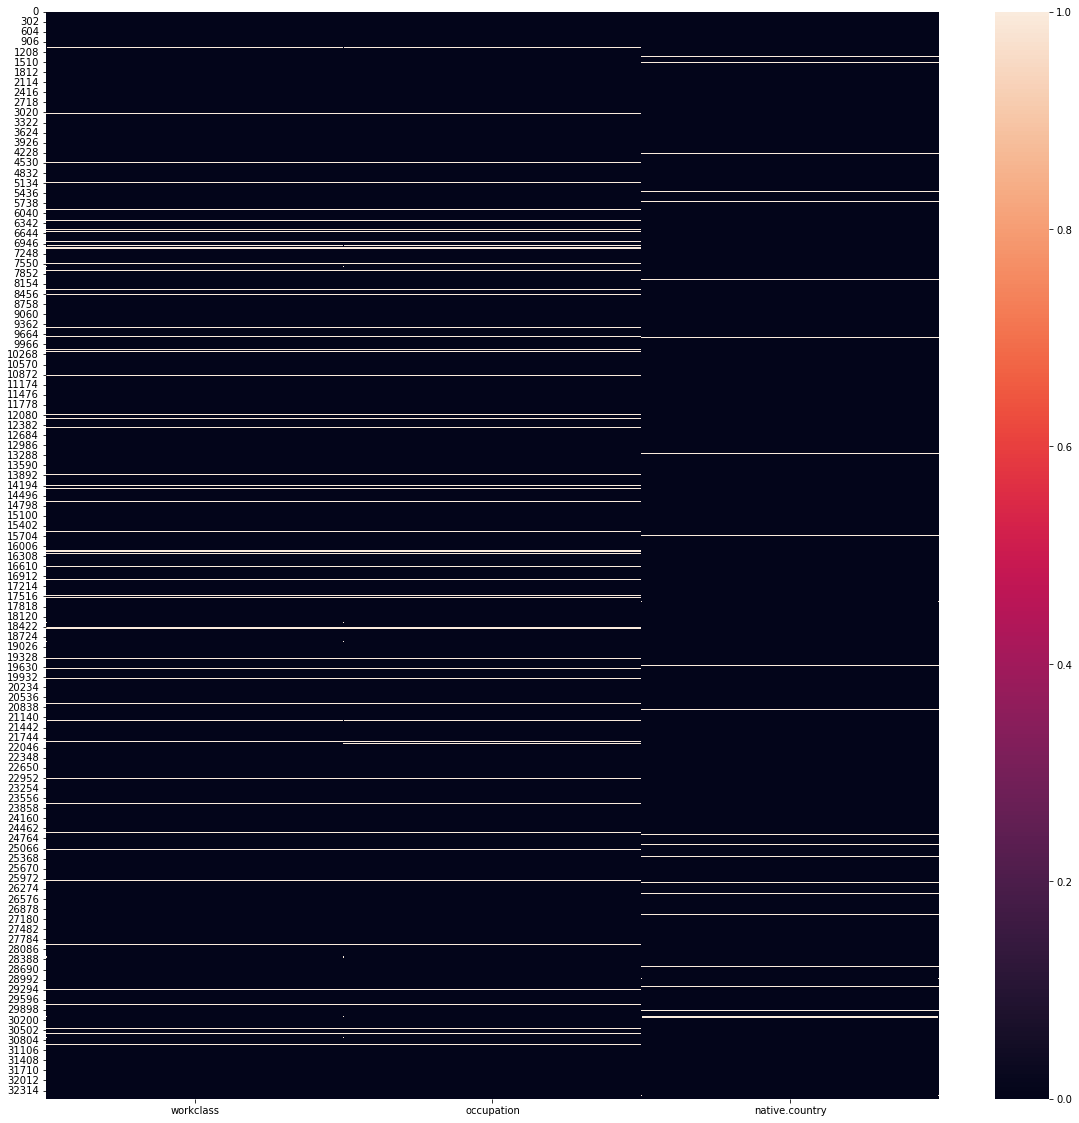

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['workclass','occupation','native.country']].isna())

Missing value pada workclass dan occupation saling berhubungan, keduanya sering tidak memiliki data secara bersamaan.  
Kita bisa mengisi missing value pada kolom2 di atas dengan kategori baru, untuk menandai bahwa data2 tersebut adalah missing value.


## Preprocessing

In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
cat_features=df.columns[df.dtypes=='object'] # kolom-kolom dengan tipe data string/ categorical
cat_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [9]:
df[cat_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


preprocessing:
* missing value: simple imputer constant
* one hot encoding: relationship, sex, race (karena data nominal, dengan jumlah kategori tidak terlalu banyak)
* binary encoding: workclass, marital status, occupation, native country (karena data nominal dengan jumlah kategori relativ banyak, contoh, native country ada 41 kategori) (missing value ada di 3/4 kolom di sini)
* ordinal: education (data ordinal) (sudah diencode didata awal)
* no treatment: numerical

drop: fnlwgt 

In [10]:
binary_pipe=Pipeline([('imputer',SimpleImputer(strategy='constant', fill_value='NC')),
                     ('encoder', ce.BinaryEncoder(drop_invariant=True))])
# dengan pipeline, kita menggabungkan proses mengisi missing value dan encoding dengan binari menjadi 1 step
# pipeline --> melakukan beberapa step berurutan secara sekaligus
# column transformer --> melakukan beberapa transformasi pararel terhadap beberapa kolom secara sekaligus

In [11]:
# binary_pipe.fit_transform(df[['workclass']])

In [12]:
transformer= ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'),['relationship','sex','race']),
    ('binary', binary_pipe,['workclass','marital.status', 'occupation', 'native.country']),
], remainder='passthrough')

## Splitting data

In [13]:
x=df.drop(columns=['fnlwgt','education','income'])
y=np.where(df['income']=='>50K',1,0)

In [14]:
y.sum()

7841

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x,y,
                                                  stratify=y,
                                                  random_state=10)

## Data Transformation

In [16]:
x_train_preprocessed=pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessed=pd.DataFrame(transformer.transform(x_test))

In [17]:
x_test_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,37.0,10.0,7298.0,0.0,36.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,31.0,9.0,0.0,0.0,40.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,50.0,7.0,0.0,2444.0,40.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,34.0,9.0,0.0,0.0,48.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,32.0,9.0,0.0,1672.0,40.0


In [18]:
transformer.transformers_[0][1].get_feature_names()

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Male', 'x2_Asian-Pac-Islander',
       'x2_Black', 'x2_Other', 'x2_White'], dtype=object)

In [19]:
transformer.transformers_[1][1][1].get_feature_names()

['0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_1',
 '1_2',
 '1_3',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [20]:
x.columns[x.dtypes!=object] # kolom yang bukan kategorikal

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [21]:
features=list(transformer.transformers_[0][1].get_feature_names())+transformer.transformers_[1][1][1].get_feature_names()+list(x.columns[x.dtypes!=object])

In [22]:
x_train_preprocessed.columns=features
x_test_preprocessed.columns=features

In [23]:
x_train_preprocessed[['0_1','0_2','0_3','0_4']]

,0_1,0_2,0_3,0_4
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
24415,0.0,1.0,0.0,0.0
24416,0.0,0.0,0.0,1.0
24417,0.0,0.0,1.0,0.0
24418,0.0,0.0,1.0,0.0


## Model Fitting and Evaluation

In [24]:
model=DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(x_train_preprocessed,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [25]:
y_pred=model.predict(x_test_preprocessed)
print('score =', accuracy_score(y_test,y_pred))

score = 0.8422798182041519


## Model Properties

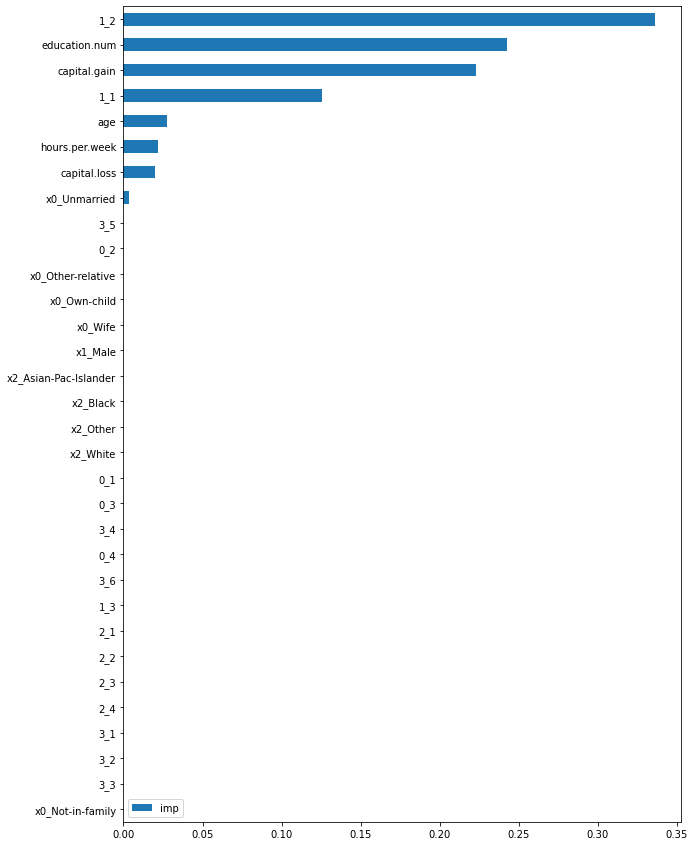

In [26]:
pd.DataFrame({'imp':model.feature_importances_}, index=features).sort_values('imp').plot(kind='barh', figsize=(10,15))
# berdasarkan gambar di bawah, feature yang paling berpengaruh dalam penentuan income adalah 
# marital status, diikuti, education, capital gain, age, hours per week, capital loss dan relationship status.

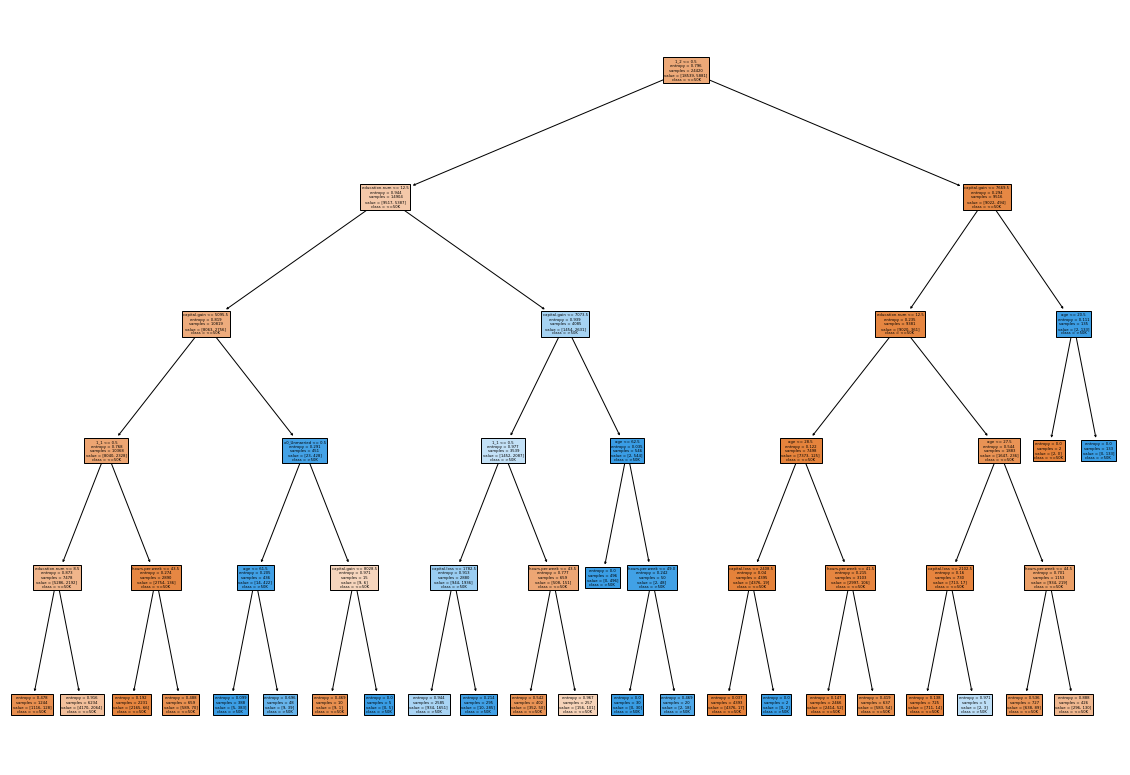

In [27]:
plt.figure(figsize=(20,14))
plot_tree(model,feature_names=features, filled=True, class_names=['<=50K','>50K'])
plt.show()

# Model Based Feature Selection  

Berdasarkan feature importance model di atas, kita bisa coba drop feature-feature yang memiliki nilai importance rendah.  
Mari kita coba drop: workclass, occupation, race, sex, native country dan marital status

In [28]:
x2=x.copy()

In [29]:
x2=x2.drop(columns=['workclass','occupation','race','sex','native.country','marital.status'])

In [30]:
x2.head()

,age,education.num,relationship,capital.gain,capital.loss,hours.per.week
0,90,9,Not-in-family,0,4356,40
1,82,9,Not-in-family,0,4356,18
2,66,10,Unmarried,0,4356,40
3,54,4,Unmarried,0,3900,40
4,41,10,Own-child,0,3900,40


In [31]:
x2.isna().sum()

age               0
education.num     0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

## Transformer

In [32]:
transformer2= ColumnTransformer([
    ('binary', ce.BinaryEncoder(drop_invariant=True),['relationship'])
],remainder='passthrough')

In [33]:
#splitting data (x2)
x_train,x_test,y_train,y_test=train_test_split(x2,y, stratify=y, random_state=10)

## Data Transform

In [34]:
x_train_preprocessed=pd.DataFrame(transformer2.fit_transform(x_train))
x_test_preprocessed=pd.DataFrame(transformer2.transform(x_test))

In [35]:
features2=transformer2.transformers_[0][1].get_feature_names()+list(x2.columns[x2.dtypes!=object])

In [36]:
x_train_preprocessed.columns=features2
x_test_preprocessed.columns=features2

In [37]:
x_train_preprocessed.head()

,relationship_1,relationship_2,relationship_3,age,education.num,capital.gain,capital.loss,hours.per.week
0,0,0,1,63,9,0,0,40
1,0,0,1,47,13,0,0,40
2,0,0,1,90,4,0,0,40
3,0,0,1,64,9,7298,0,45
4,0,1,0,33,13,0,0,50


## Fitting and Evaluation

In [38]:
model=DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(x_train_preprocessed,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [39]:
y_pred2=model.predict(x_test_preprocessed)
print('score=', accuracy_score(y_test,y_pred2))

score= 0.8357695614789338


In [40]:
print('score before feature selection', accuracy_score(y_test,y_pred))

score before feature selection 0.8422798182041519


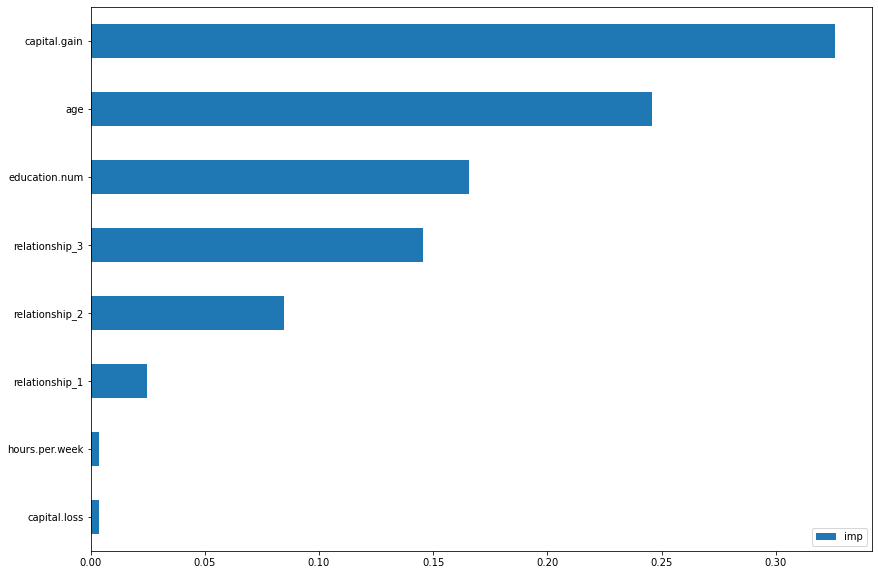

In [41]:
pd.DataFrame({'imp':model.feature_importances_}, index=features2).sort_values('imp').plot(kind='barh', figsize=(14,10))

# Feature Selection: Univariate Statistics

In [42]:
x.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [43]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(drop='first'),
                                 ['relationship', 'sex', 'race']),
                                ('binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='NC',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  BinaryEncoder(drop_invariant=True))]),
                                 ['workclass', 'marital.status', 'occupation',
                                  'native.country'])])

In [44]:
# splitting
x_train,x_test,y_train,y_test= train_test_split(x,y,stratify=y,random_state=10)

In [45]:
x_train_preprocessed=pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessed=pd.DataFrame(transformer.transform(x_test))

In [46]:
x_test_preprocessed.columns=features
x_train_preprocessed.columns=features

In [47]:
x_train_preprocessed.head()

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Male,x2_Asian-Pac-Islander,x2_Black,x2_Other,x2_White,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,63.0,9.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,47.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,90.0,4.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,64.0,9.0,7298.0,0.0,45.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,33.0,13.0,0.0,0.0,50.0


## Select features

In [48]:
from sklearn.feature_selection import SelectPercentile, SelectKBest, RFE, chi2

In [49]:
select=SelectPercentile(score_func=chi2, percentile=50) #pilih 50% feature terbaik berdasarkan uji statistik chi2
select.fit(x_train_preprocessed,y_train)

SelectPercentile(percentile=50,
                 score_func=<function chi2 at 0x000001C24DBEC1F0>)

In [50]:
selected_features=pd.DataFrame({'feature':features, 'select': select.get_support()})

In [51]:
selected_features[selected_features['select']==True]

,feature,select
0,x0_Not-in-family,True
1,x0_Other-relative,True
2,x0_Own-child,True
3,x0_Unmarried,True
4,x0_Wife,True
5,x1_Male,True
7,x2_Black,True
14,1_1,True
15,1_2,True
17,2_1,True


In [52]:
len(x_train_preprocessed.columns)

32

In [53]:
selected_features['select'].sum() #terpilih hanya 50%

16

In [54]:
kolom=selected_features[selected_features['select']==True]['feature']

In [55]:
x_train_select=pd.DataFrame(select.transform(x_train_preprocessed), columns=kolom)
x_test_select=pd.DataFrame(select.transform(x_test_preprocessed), columns=kolom)

In [56]:
x_train_select.head()

feature,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Male,x2_Black,1_1,1_2,2_1,2_4,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,63.0,9.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,90.0,4.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64.0,9.0,7298.0,0.0,45.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,33.0,13.0,0.0,0.0,50.0


## Fitting and Evaluation Model

In [57]:
model= DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(x_train_select,y_train)
print('score=', accuracy_score(y_test, model.predict(x_test_select)))

score= 0.8422798182041519


# Iterative Feature Selection

In [58]:
model=DecisionTreeClassifier(max_depth=5,criterion='entropy')
rfe=RFE(model)

In [59]:
rfe.fit(x_train_preprocessed,y_train)

RFE(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5))

In [60]:
selected_features=pd.DataFrame({'select':rfe.support_}, index=features)

In [61]:
kolom=selected_features[selected_features['select']==True].index

In [62]:
x_train_select=pd.DataFrame(rfe.transform(x_train_preprocessed), columns=kolom)
x_test_select=pd.DataFrame(rfe.transform(x_test_preprocessed), columns=kolom)

In [63]:
model.fit(x_train_select,y_train)
print('score',accuracy_score(y_test,model.predict(x_test_select)))

score 0.8422798182041519


# latihan

In [64]:
df= pd.read_csv('melb_data.csv')

In [65]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


* Drop: address, lattitude dan longitude
* Ubah kolom Date menjadi Season (cek musim untuk tiap bulan)
 
* Target: Price

* tentukan skema preprocessing yang sesuai 
* Pilih fitur menggunakan  :
    * Tanpa pemilihan
    * univariate statistics
    * iterative feature selection  
* Pakai model: Decision Tree Regressor (max depth=5),dan Ridge Regressor(default)    

Bandingkan performa model dan fitur yang terpilih (dan koefisiennya).


In [66]:
df=df.drop(columns=['Address','Lattitude','Longtitude'])

In [67]:
df.isna().sum()/df.shape[0]*100

Suburb            0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [68]:
df['Month']=pd.to_datetime(df['Date']).dt.month

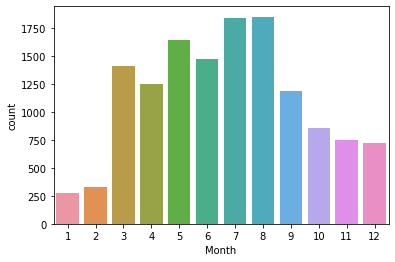

In [69]:
sns.countplot(x=df['Month'])

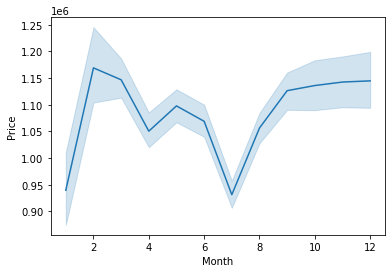

In [70]:
sns.lineplot(x='Month',y='Price', data=df)

In [71]:
df=df.drop(columns='Date')

In [72]:
df=df.dropna(subset=['Car'])

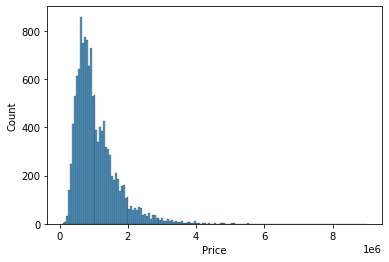

In [73]:
sns.histplot(df['Price'])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13518 non-null  object 
 1   Rooms          13518 non-null  int64  
 2   Type           13518 non-null  object 
 3   Price          13518 non-null  float64
 4   Method         13518 non-null  object 
 5   SellerG        13518 non-null  object 
 6   Distance       13518 non-null  float64
 7   Postcode       13518 non-null  float64
 8   Bedroom2       13518 non-null  float64
 9   Bathroom       13518 non-null  float64
 10  Car            13518 non-null  float64
 11  Landsize       13518 non-null  float64
 12  BuildingArea   7101 non-null   float64
 13  YearBuilt      8174 non-null   float64
 14  CouncilArea    12211 non-null  object 
 15  Regionname     13518 non-null  object 
 16  Propertycount  13518 non-null  float64
 17  Month          13518 non-null  int64  
dtypes: flo

In [75]:
df['Postcode']=df['Postcode'].astype(np.int64).astype(object)

In [76]:
cate=df.columns[df.dtypes=='object']

In [77]:
for i in cate:
    print(i,df[i].nunique())

Suburb 314
Type 3
Method 5
SellerG 268
Postcode 198
CouncilArea 33
Regionname 8


In [78]:
name=list(df['SellerG'].value_counts().index[:10])

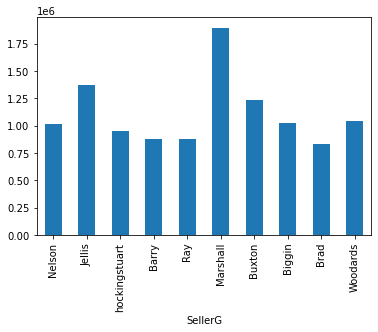

In [79]:
df.groupby('SellerG').mean()['Price'].loc[name].plot(kind='bar')

In [80]:
numerik=df.columns[df.dtypes !='object']

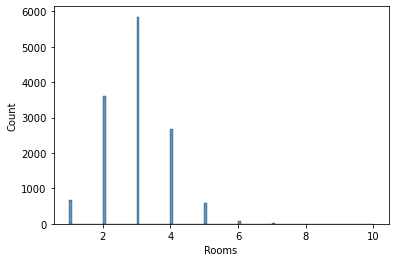

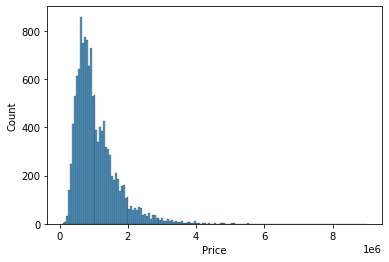

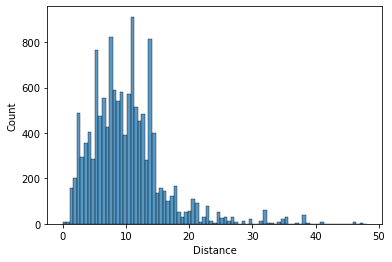

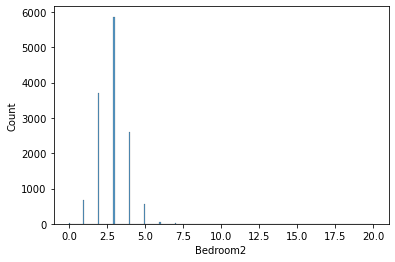

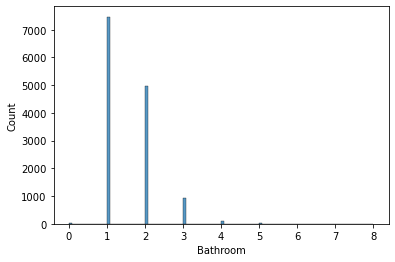

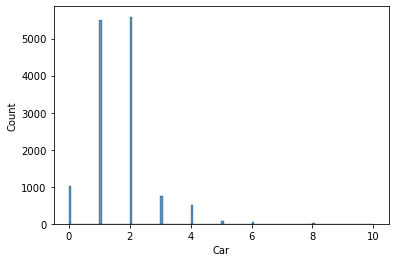

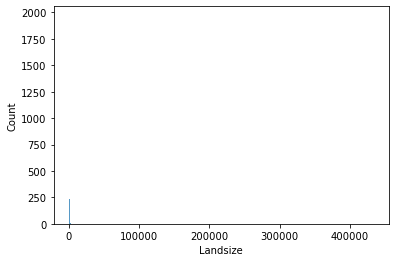

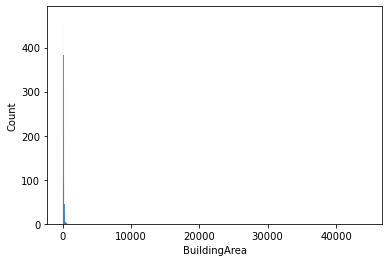

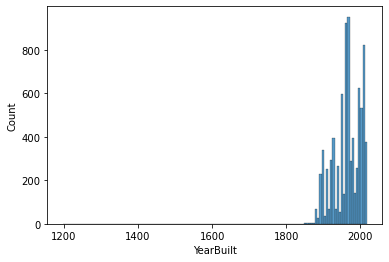

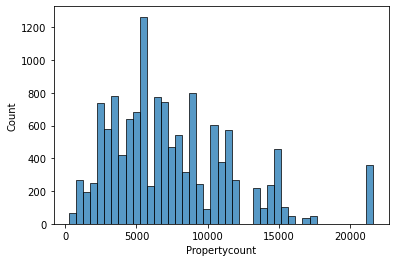

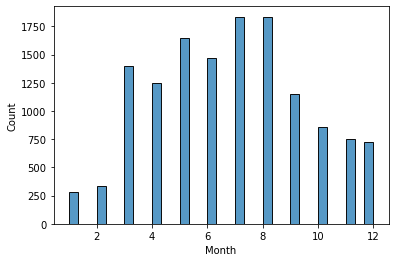

In [81]:
for i in numerik:
    sns.histplot(df[i])
    plt.show()

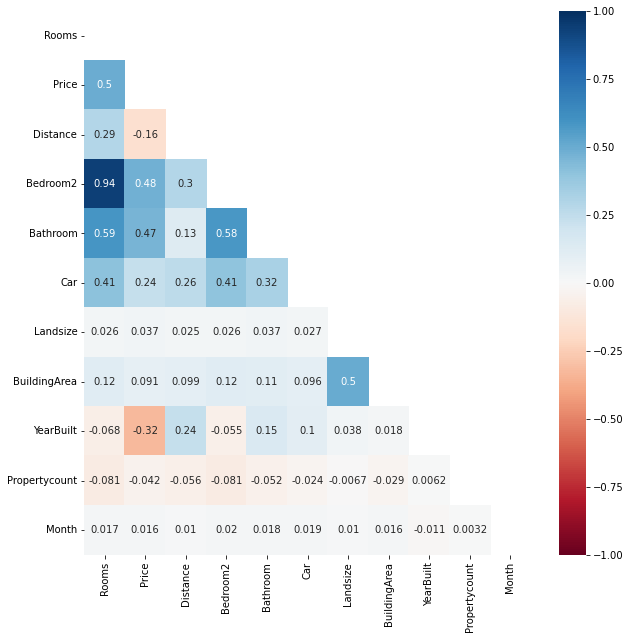

In [82]:
corr=df[numerik].corr()
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,vmax=1,vmin=-1,mask=dropSelf,cmap='RdBu')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13518 non-null  object 
 1   Rooms          13518 non-null  int64  
 2   Type           13518 non-null  object 
 3   Price          13518 non-null  float64
 4   Method         13518 non-null  object 
 5   SellerG        13518 non-null  object 
 6   Distance       13518 non-null  float64
 7   Postcode       13518 non-null  object 
 8   Bedroom2       13518 non-null  float64
 9   Bathroom       13518 non-null  float64
 10  Car            13518 non-null  float64
 11  Landsize       13518 non-null  float64
 12  BuildingArea   7101 non-null   float64
 13  YearBuilt      8174 non-null   float64
 14  CouncilArea    12211 non-null  object 
 15  Regionname     13518 non-null  object 
 16  Propertycount  13518 non-null  float64
 17  Month          13518 non-null  int64  
dtypes: flo

In [84]:
cate

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'CouncilArea',
       'Regionname'],
      dtype='object')

# Skema
drop: Rooms (korelasi tinggi dengan bedroom2), SellerG , Suburb, postcode (terwakili oleh region dan council)

## Categorical
* Onehot Encoder: 'Type', 'Method'
* Simple Imputer (konstan), Binary Encoder: 'CouncilArea','Regionname'

## Numeric

Iterative imputer: BuildingArea, YearBuilt, Bedroom2, Landsize

Sisanya Passthrough


In [119]:
df=df.drop(columns=['Rooms','SellerG','Suburb','Postcode'])

KeyError: "['Rooms' 'SellerG' 'Suburb' 'Postcode'] not found in axis"

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [131]:
binary_pipe=Pipeline([
    ('impute',SimpleImputer(strategy='constant',fill_value='C')),
    ('Binary',ce.BinaryEncoder(drop_invariant=True))
    ])

transformer=ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'),['Type', 'Method']),
    ('binary',binary_pipe,['CouncilArea','Regionname']),
    ('iterative',IterativeImputer(),['BuildingArea', 'YearBuilt', 'Landsize', 'Bedroom2'])
],remainder='passthrough')

In [132]:
x=df.drop(columns='Price')
y=df['Price']

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2020) #bisa stratify berdasarkan region/council

In [134]:
x_train_preprocessed= transformer.fit_transform(x_train)
x_test_preprocessed= transformer.transform(x_test)

In [135]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['Type', 'Method']),
 ('binary',
  Pipeline(steps=[('impute', SimpleImputer(fill_value='C', strategy='constant')),
                  ('Binary', BinaryEncoder(drop_invariant=True))]),
  ['CouncilArea', 'Regionname']),
 ('iterative',
  IterativeImputer(),
  ['BuildingArea', 'YearBuilt', 'Landsize', 'Bedroom2']),
 ('remainder', 'passthrough', [2, 4, 5, 11, 12])]

In [125]:
transformer.transformers_[0][1].get_feature_names_out()

array(['Type_t', 'Type_u', 'Method_S', 'Method_SA', 'Method_SP',
       'Method_VB'], dtype=object)

In [126]:
transformer.transformers_[1][1][1].get_feature_names()

['0_1', '0_2', '0_3', '0_4', '0_5', '0_6', '1_0', '1_1', '1_2', '1_3']

In [137]:
x.iloc[:,[2, 4, 5, 11, 12]].columns

Index(['Distance', 'Bathroom', 'Car', 'Propertycount', 'Month'], dtype='object')

In [138]:
kolom=list(transformer.transformers_[0][1].get_feature_names_out())+transformer.transformers_[1][1][1].get_feature_names()+['BuildingArea', 'YearBuilt', 'Landsize', 'Bedroom2', 'Distance', 'Bathroom', 'Car', 'Propertycount', 'Month']
kolom

['Type_t',
 'Type_u',
 'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '0_5',
 '0_6',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 'BuildingArea',
 'YearBuilt',
 'Landsize',
 'Bedroom2',
 'Distance',
 'Bathroom',
 'Car',
 'Propertycount',
 'Month']

In [139]:
x_train_preprocessed=pd.DataFrame(x_train_preprocessed,columns=kolom)
x_test_preprocessed=pd.DataFrame(x_test_preprocessed,columns=kolom)
x_train_preprocessed.head()

,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,0_1,0_2,0_3,0_4,...,1_3,BuildingArea,YearBuilt,Landsize,Bedroom2,Distance,Bathroom,Car,Propertycount,Month
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,93.572162,1966.102343,0.0,2.0,11.2,1.0,2.0,21650.0,12.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,135.000000,1975.000000,830.0,3.0,21.1,2.0,0.0,2003.0,7.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,89.000000,1975.000000,0.0,2.0,11.2,1.0,1.0,2291.0,4.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,148.993064,1964.728084,452.0,3.0,8.0,2.0,1.0,6380.0,3.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,41.000000,1970.000000,0.0,1.0,6.5,1.0,1.0,8870.0,11.0


* Pilih fitur menggunakan  :
    * Tanpa pemilihan
    * univariate statistics
    * iterative feature selection  
* Pakai model: Decision Tree Regressor (max depth=5),dan Ridge Regressor(default)    

Bandingkan performa model dan fitur yang terpilih (dan koefisiennya).

In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.feature_selection import f_regression

In [141]:
#tree
score=[]
tree=DecisionTreeRegressor(max_depth=5)

In [142]:
#base
tree.fit(x_train_preprocessed,y_train)
y_pred= tree.predict(x_test_preprocessed)
score.append([mean_squared_error(y_test, y_pred)**(1/2),mean_absolute_error(y_test,y_pred)])
imp=pd.DataFrame(tree.feature_importances_,index=kolom,columns=['base'])

In [143]:
#univariate
select_tree= SelectPercentile(score_func=f_regression, percentile=50 )
select_tree.fit(x_train_preprocessed, y_train)
selected_features=pd.DataFrame({'features':kolom, 'select':select_tree.get_support()})

In [144]:
x_train_select=pd.DataFrame(select_tree.transform(x_train_preprocessed),columns=selected_features[selected_features['select']==True]['features'])
x_test_select=pd.DataFrame(select_tree.transform(x_test_preprocessed),columns=selected_features[selected_features['select']==True]['features'])

In [145]:
tree=DecisionTreeRegressor(max_depth=5)
tree.fit(x_train_select,y_train)
y_pred= tree.predict(x_test_select)
score.append([mean_squared_error(y_test, y_pred)**(1/2),mean_absolute_error(y_test,y_pred)])
imp=imp.join(pd.DataFrame(tree.feature_importances_,index=selected_features[selected_features['select']==True]['features'].tolist(),columns=['univariate']))

In [146]:
# iterative
tree=DecisionTreeRegressor(max_depth=5)
rfe_tree= RFE(tree)
rfe_tree.fit(x_train_preprocessed,y_train)
features_select=pd.DataFrame({'select':rfe_tree.support_}, index=kolom)

In [147]:
x_train_select=pd.DataFrame(rfe_tree.transform(x_train_preprocessed),columns=features_select[features_select['select']==True].index)
x_test_select= pd.DataFrame(rfe_tree.transform(x_test_preprocessed),columns=features_select[features_select['select']==True].index)

In [148]:
tree=DecisionTreeRegressor(max_depth=5)
tree.fit(x_train_select,y_train)
y_pred= tree.predict(x_test_select)
score.append([mean_squared_error(y_test, y_pred)**(1/2),mean_absolute_error(y_test,y_pred)])
imp=imp.join(pd.DataFrame(tree.feature_importances_,index=features_select[features_select['select']==True].index.tolist(),columns=['iterative']))

In [149]:
score

[[369340.3006734088, 248506.89472245236],
 [370064.4347179881, 247681.17785928765],
 [369340.3006734088, 248506.89472245236]]

In [150]:
score_tree=pd.DataFrame(score,columns=['RMSE','MAE'],index=['Base', 'Univariate','iterative'])
score_tree

,RMSE,MAE
Base,369340.300673,248506.894722
Univariate,370064.434718,247681.177859
iterative,369340.300673,248506.894722


In [151]:
pd.DataFrame({'univariate':select_tree.get_support(),'iterative':rfe_tree.support_}, index=kolom)

,univariate,iterative
Type_t,False,True
Type_u,True,True
Method_S,False,False
Method_SA,False,False
Method_SP,False,False
Method_VB,False,False
0_1,False,False
0_2,True,False
0_3,False,True
0_4,True,False


In [152]:
imp

,base,univariate,iterative
Type_t,0.006178,NaN,0.006178
Type_u,0.113063,0.116120,0.113063
Method_S,0.000000,NaN,NaN
Method_SA,0.000000,NaN,NaN
Method_SP,0.000000,NaN,NaN
Method_VB,0.000000,NaN,NaN
0_1,0.000000,NaN,NaN
0_2,0.000000,0.000000,NaN
0_3,0.005039,NaN,0.005039
0_4,0.000000,0.000000,NaN


In [153]:
# Ridge
score=[]
ridge=Ridge()

In [154]:
#base
ridge.fit(x_train_preprocessed,y_train)
y_pred= ridge.predict(x_test_preprocessed)
score.append([mean_squared_error(y_test, y_pred)**(1/2),mean_absolute_error(y_test,y_pred)])
coef=pd.DataFrame(ridge.coef_,index=kolom,columns=['base'])


In [155]:
#univariate
select_ridge= SelectPercentile(score_func=f_regression, percentile=50 )
select_ridge.fit(x_train_preprocessed, y_train)
selected_features=pd.DataFrame({'features':kolom, 'select':select_ridge.get_support()})
x_train_select=pd.DataFrame(select_ridge.transform(x_train_preprocessed),columns=selected_features[selected_features['select']==True]['features'])
x_test_select=pd.DataFrame(select_ridge.transform(x_test_preprocessed),columns=selected_features[selected_features['select']==True]['features'])

ridge.fit(x_train_select,y_train)
y_pred= ridge.predict(x_test_select)
score.append([mean_squared_error(y_test, y_pred)**(1/2),mean_absolute_error(y_test,y_pred)])
coef=coef.join(pd.DataFrame(ridge.coef_,index=selected_features[selected_features['select']==True]['features'].tolist(),columns=['univariate']))

In [156]:
# iterative
ridge=Ridge()
rfe_ridge= RFE(ridge)
rfe_ridge.fit(x_train_preprocessed,y_train)
features_select=pd.DataFrame({'select':rfe_ridge.support_}, index=kolom)
x_train_select=pd.DataFrame(rfe_ridge.transform(x_train_preprocessed),columns=features_select[features_select['select']==True].index)
x_test_select= pd.DataFrame(rfe_ridge.transform(x_test_preprocessed),columns=features_select[features_select['select']==True].index)

ridge=Ridge()
ridge.fit(x_train_select,y_train)
y_pred= ridge.predict(x_test_select)
score.append([mean_squared_error(y_test, y_pred)**(1/2),mean_absolute_error(y_test,y_pred)])
coef=coef.join(pd.DataFrame(ridge.coef_,index=features_select[features_select['select']==True].index.tolist(),columns=['iterative']))


In [157]:
score

[[539959.3903799632, 271958.94616795174],
 [605924.6601424244, 281458.4962157352],
 [434630.519476113, 315255.8453922118]]

In [158]:
score_ridge=pd.DataFrame(score,columns=['RMSE','MAE'],index=['Base', 'Univariate','iterative'])
score_ridge


,RMSE,MAE
Base,539959.390380,271958.946168
Univariate,605924.660142,281458.496216
iterative,434630.519476,315255.845392


In [159]:
pd.DataFrame({'univariate':select_ridge.get_support(),'iterative':rfe_ridge.support_}, index=kolom)

,univariate,iterative
Type_t,False,True
Type_u,True,True
Method_S,False,True
Method_SA,False,False
Method_SP,False,False
Method_VB,False,False
0_1,False,True
0_2,True,True
0_3,False,False
0_4,True,True


In [160]:
coef

,base,univariate,iterative
Type_t,-260838.009503,NaN,-335400.156523
Type_u,-461345.045844,-402327.720465,-465317.779146
Method_S,82546.807877,NaN,33325.267928
Method_SA,40645.446803,NaN,NaN
Method_SP,38813.650301,NaN,NaN
Method_VB,32877.460994,NaN,NaN
0_1,301924.804768,NaN,-48710.874806
0_2,-64541.474905,-13723.634340,-101542.149915
0_3,7776.765686,NaN,NaN
0_4,142009.445431,178657.043284,210335.288388
